# DBSCAN Hyperparameters


Exploring the hyperparameters for DBSCAN and how they can change results.

## DBSCAN and Clustering Examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
two_blobs = pd.read_csv('../Data/cluster_two_blobs.csv')

In [3]:
two_blobs.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


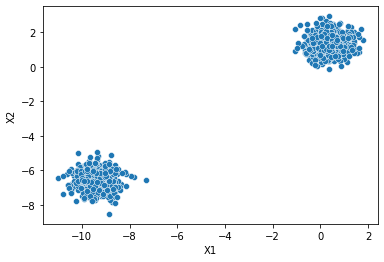

In [4]:
sns.scatterplot(data=two_blobs, x='X1', y='X2');

In [5]:
two_blobs_outliers = pd.read_csv('../Data/cluster_two_blobs_outliers.csv')

In [6]:
two_blobs_outliers.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


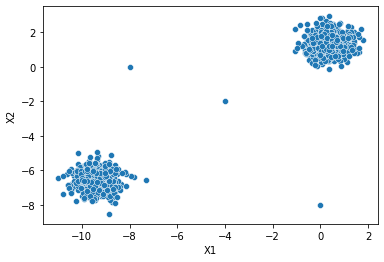

In [7]:
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2');

-------

## Label Discovery

In [8]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1');

--------

## DBSCAN

In [9]:
from sklearn.cluster import DBSCAN

In [10]:
dbscan = DBSCAN()

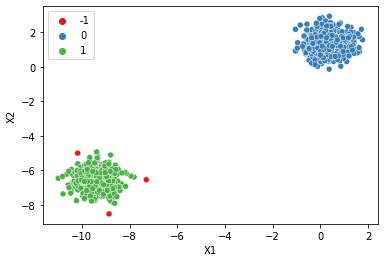

In [11]:
display_categories(dbscan, two_blobs)

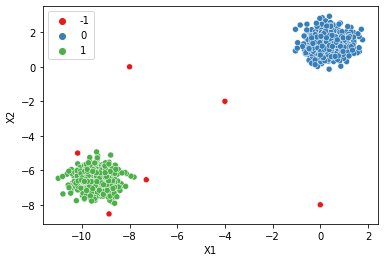

In [12]:
display_categories(dbscan, two_blobs_outliers)

-------

# Hyperparameters

# 1) Epsilon

    eps : float, default=0.5
     |      The maximum distance between two samples for one to be considered
     |      as in the neighborhood of the other. This is not a maximum bound
     |      on the distances of points within a cluster. This is the most
     |      important DBSCAN parameter to choose appropriately for your data set
     |      and distance function.

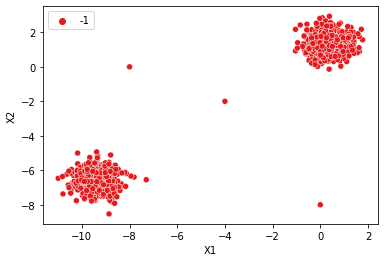

In [13]:
# Tiny Epsilon ===> Tiny Max Distance ====> Everything is an outliers (class=-1)

dbscan = DBSCAN(eps=0.001)
display_categories(dbscan, two_blobs_outliers)

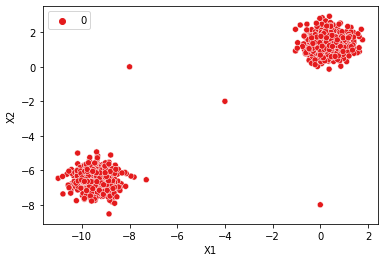

In [14]:
# Huge Epsilon ===> Huge Max Distance ===> Everything in the same cluster (class=0)
# NOTE that Class becomes 0, not -1 (which is for outliers)

dbscan = DBSCAN(eps=10)
display_categories(dbscan, two_blobs_outliers)

### How to find a good epsilon?

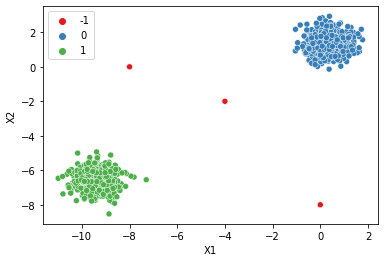

In [15]:
dbscan = DBSCAN(eps=1)
display_categories(dbscan, two_blobs_outliers)

  We can see which points are in which cluster

In [16]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64)

### Number of Unique Clusters found

In [17]:
np.unique(dbscan.labels_)

array([-1,  0,  1], dtype=int64)

In [18]:
len(np.unique(dbscan.labels_))

3

### Number of Outliers

This is a very useful info as we can check our expection of how many outliers should be there..

In [19]:
dbscan.labels_ == -1

array([False, False, False, ...,  True,  True,  True])

In [20]:
np.sum(dbscan.labels_ == -1)

# there are 3 outliers

3

### Percentage of Outliers

In [21]:
# Percentage of outliers 

100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

0.29910269192422734

--------

## Charting reasonable Epsilon values

Ref: bend the knee! https://raghavan.usc.edu/papers/kneedle-simplex11.pdf

In [29]:
outliers_percent = []
number_of_outliers = []

for eps in np.linspace(0.001, 10, 100):
    # Create model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # Total Number of Outliers Found
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Percentage of Outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outliers_percent.append(perc_outliers)

### using Number of Outliers and Plotting out

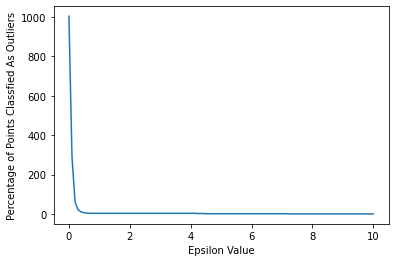

In [30]:
# using number of outliers

sns.lineplot(x=np.linspace(0.001, 10, 100), y=number_of_outliers);
plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of Points Classfied As Outliers');

If we want to **Zoom In**, we can do as below.

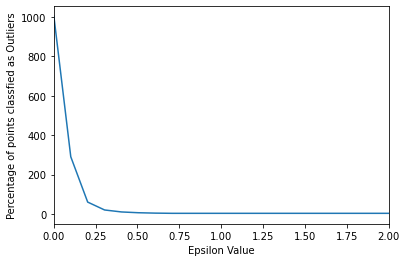

In [24]:
# zooming in with Epsilon values between 0 and 2

sns.lineplot(x=np.linspace(0.001, 10, 100), y=number_of_outliers);
plt.xlim(0, 2)

plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of points classfied as Outliers');

-----


### using Percentage of Outliers and Plotting out

If so, we could "target" a percentage, like choose a range producing 1%-5% as outliers.


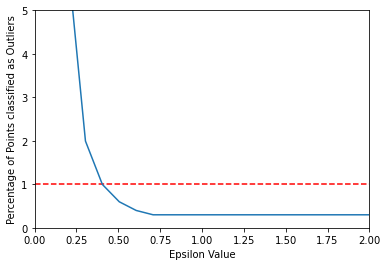

In [25]:
sns.lineplot(x=np.linspace(0.001, 10, 100), y=outliers_percent);

plt.xlim(0, 2)
plt.ylim(0, 5)
plt.hlines(y=1, xmin=0, xmax=2, colors='red', ls='--')

plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of Points classified as Outliers');

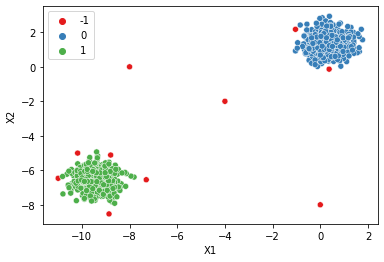

In [26]:
# how do we find the good epsilon?
dbscan = DBSCAN(eps=0.4)
display_categories(dbscan, two_blobs_outliers)

--------

# Searching best Epsilon values

## Targeting in terms of number of outliers and Searching for the best Epislon value

If so, we could "target" a number of outliers, such as 3 points as outliers.

Of course this can use in terms of Percentage of outliers too (Let's say we are targeting or expecting 1% of outliers, etc)

------

If we are expecting/targetting #number of outliers ahead of time, we can clearly draw a red line on that #number and see how it goes.

Let's say we are looking for #number of outliers of 3, then we can see Epsilon value of around 0.75 to 4 is the sweet spot.

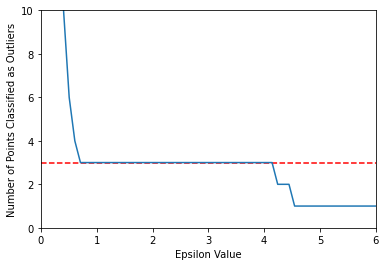

In [27]:
sns.lineplot(x=np.linspace(0.001, 10, 100), y=number_of_outliers)
plt.xlim(0,6)
plt.ylim(0,10)
plt.hlines(y=3, xmin=0, xmax=10, colors='red', ls='--')

plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value");

We can confirm this finding by changing the Epsilon value in our scatter plot and see how it is chaning the outliers and our clusters.

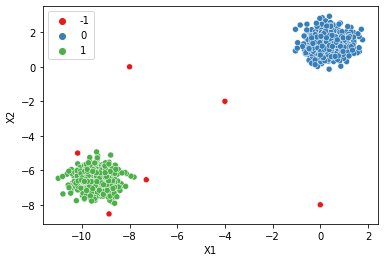

In [33]:
# dbscan = DBSCAN(eps=0.5)       # many outliers
# dbscan = DBSCAN(eps=1)           # outliers start to drop

# dbscan = DBSCAN(eps=3)
display_categories(dbscan, two_blobs_outliers)

------
-------
--------

# 2) Minimum Samples


     |  min_samples : int, default=5
     |      The number of samples (or total weight) in a neighborhood for a point
     |      to be considered as a core point. This includes the point itself.
     

How to choose minimum number of points?

https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan

------

+ This will be very similar to using Epsilon values, we will use the similar Elbow method to find out how it looks like for every #number of minimum samples.
+ In this case, we want to use whole number instead of linear spacing points (as #of minimum samples will be whole numbers).
+ For the range, it depends on the number of points in our datasets.

Take note that the higher the number of points (in our case 100 bound) we look for as Minium Samples, the more there will be number of outliers. Because one couldn't satisfy that defined threshold.


In [39]:
outlier_percent = []
number_of_outliers = []

for n in np.arange(1, 100):
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers) 
    
    # Total number of outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Percentage of points classified as outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

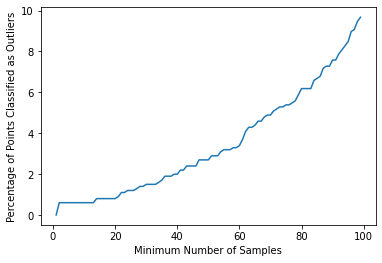

In [42]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)

plt.xlabel("Minimum Number of Samples");
plt.ylabel("Percentage of Points Classified as Outliers");

--------

## Good Starting value of `Minimum Number of Samples`
+ Formula: `2 * Number of Dimensions of our data`

In [46]:
two_blobs_outliers.shape

(1003, 2)

In this case, there are 2 dimensions. So Minimum Number of Samples will be 2 * 2 = 4.

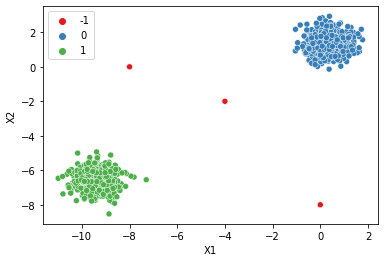

In [49]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(min_samples = 2 * num_dim, eps=0.75)
display_categories(dbscan, two_blobs_outliers)

--------

# using Combiniation of Epislon value and Minimum Samples

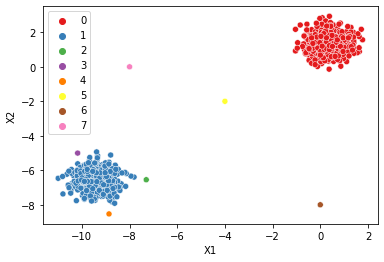

In [43]:
# if we use min number of samples to 1, every point will become as its own cluster. 
# itt makes sense because it fulfill the condition of satisfying Minimum Number of points (1) which should be included in the cluter

dbscan = DBSCAN(min_samples=1)
display_categories(dbscan, two_blobs_outliers);

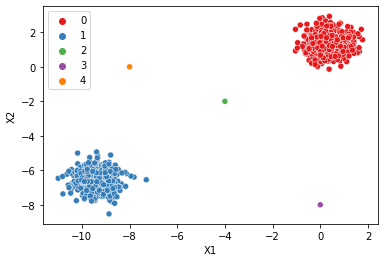

In [45]:
# combination of epsilon value and min_samples

# now in this case, the three points will be considered as its own unique cluster (NOT AS OUTLIERS) because we set min_samples value as 1.
# If the value of min_samples=1, there will be no outliers.

# THIS WILL BE USEFUL TO US IN A USECASE OF WHERE WE WANT TO MARK THOSE THREE POINTS AS UNIQUE CLUSTERS (INSTEAD OF OUTLIERS)

dbscan = DBSCAN(min_samples=1, eps=0.75)
display_categories(dbscan, two_blobs_outliers);